## CS/ECE/ME532 Period 11 Activity


### Preambles

In [1]:
%matplotlib notebook 
# to enable 3D plot interaction
import numpy as np # numpy
from pprint import pprint as pprint # pretty print
from scipy.io import loadmat # load & save data
from scipy.io import savemat
import matplotlib.pyplot as plt # plot
from mpl_toolkits import mplot3d
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

K-means has some 'random' components in it. You will get different results depending on your luck.
Even when you run an identical code, you will see some different results from your peers.
So... we need the following line of code to start with: 

In [ ]:
np.random.seed(2)

Indeed, one may be tempted to try so many random seeds until you get a good performance!  

*Don't* do that :-)...
Some subfields in ML are suffering from "reproduction crisis" partially due to this: See these for more details
https://arxiv.org/abs/1709.06560
https://www.nature.com/articles/d41586-019-03895-5
https://www.wired.com/story/artificial-intelligence-confronts-reproducibility-crisis/

And see the following figure from the attached paper: 
<div>
<img src="https://i.ibb.co/w7Ghdqt/Screen-Shot-2020-10-13-at-1-07-49-AM.png" width="500"/>
</div>

___
___

### 1. $K$-means and SVD for rating prediction
We return to the movies rating problem considered previously.  The movies and ratings from your friends on a scale of 1-10 are:

|Movie|Jake|Jennifer|Jada|Theo|Ioan|Bo|Juanita|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Star Trek|4|7|2|8|7|4|2|
|Pride and Prejudice|9|3|5|6|10|5|5|
|The Martian|4|8|3|7|6|4|1|
|Sense and Sensibility|9|2|6|5|9|5|4|
|Star Wars: Empire Strikes|4|9|2|8|7|4|1|

Run the following code block to create a numpy array $\boldsymbol{X}$

In [2]:
X = np.array([
    [4,7,2,8,7,4,2],
    [9,3,5,6,10,5,5],
    [4,8,3,7,6,4,1],
    [9,2,6,5,9,5,4],
    [4,9,2,8,7,4,1],
    ], float)
print(X)

[[4.00 7.00 2.00 8.00 7.00 4.00 2.00]
 [9.00 3.00 5.00 6.00 10.00 5.00 5.00]
 [4.00 8.00 3.00 7.00 6.00 4.00 1.00]
 [9.00 2.00 6.00 5.00 9.00 5.00 4.00]
 [4.00 9.00 2.00 8.00 7.00 4.00 1.00]]


> `float` is necessary as the array will only hold integers otherwise

Also, we load the $K$-mean algorithm we implemented in the last activity.

In [3]:
def dist(x, y):
    return (x-y).T@(x-y)

def kMeans(X, K, maxIters = 20):
    X_transpose = X.transpose()
    centroids = X_transpose[np.random.choice(X.shape[0], K)]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([dist(x_i, y_k) for y_k in centroids]) for x_i in X_transpose])
        # Update centroids step
        for k in range(K):
            if (C == k).any():
                centroids[k] = X_transpose[C == k].mean(axis = 0) 
            else: # if there are no data points assigned to this certain centroid
                centroids[k] = X_transpose[np.random.choice(len(X))] 
    return centroids.transpose() , C

Note that `(x-y).T@(x-y)` is the squared $L^2$ norm of $x-y$: since $x$ and $y$ are 1-d numpy arrays, the .T does not actually impact the code. 

#### 1 a) Use the $K$-means algorithm to represent the columns of $\boldsymbol{X}$ with two clusters.

In [5]:
centroids_2, C_2 = kMeans(X, 2) ## Fill in the blank: call the "kMeans" algorithm with proper input arguments
print('centroids = \n', centroids_2)
print('centroid assignment = \n', C_2)

centroids = 
 [[6.50 2.67]
 [7.00 5.00]
 [6.25 2.67]
 [6.25 5.00]
 [7.00 2.33]]
centroid assignment = 
 [0 0 1 0 0 1 1]


#### 1 b) Express the rank-2 approximation to $\boldsymbol{X}$ based on this cluster as $\boldsymbol{T}\boldsymbol{W}^T$ where the columns of $\boldsymbol{T}$ contains the cluster centers and $\boldsymbol{W}$ is a vector of ones and zeros. Compare the rank-2 clustering approximation to the original matrix.

In [7]:
# Construct rank-2 approximation using cluster
centroids_transposed_2 = centroids_2.transpose()
X_hat_2 = centroids_2[:, C_2] ## Fill in the blank
print('Rank-2 Approximation = \n', X_hat_2)

Rank-2 Approximation = 
 [[6.50 6.50 2.67 6.50 6.50 2.67 2.67]
 [7.00 7.00 5.00 7.00 7.00 5.00 5.00]
 [6.25 6.25 2.67 6.25 6.25 2.67 2.67]
 [6.25 6.25 5.00 6.25 6.25 5.00 5.00]
 [7.00 7.00 2.33 7.00 7.00 2.33 2.33]]


#### 1 c) Play with the following code! You can pick three dimensions to look at by modifying `coordinates_to_plot`.  Just have fun with it.

Text(0.5, 0, 'Dim 4')

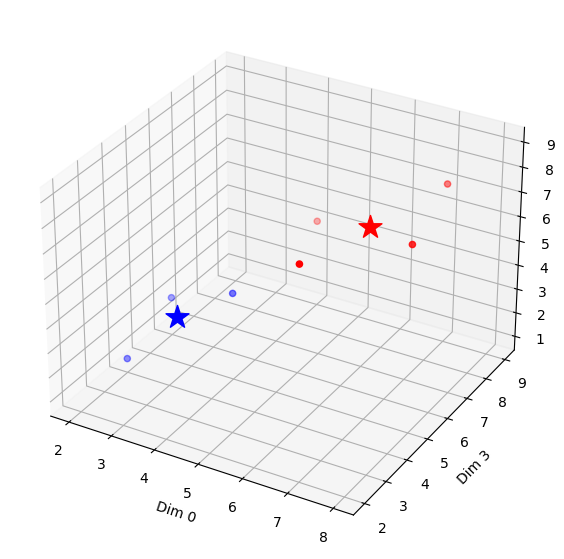

In [15]:
%matplotlib inLine

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
coordinates_to_plot = [0,3,4]
color_array = np.array(['red', 'blue'])
ax.scatter3D(
            X[coordinates_to_plot[0],:], # x
            X[coordinates_to_plot[1],:], # y
            X[coordinates_to_plot[2],:], # y
            color=color_array[C_2] # color depends on cluster idx
            )
for i in range(2):
    ax.scatter3D(
            centroids_2[coordinates_to_plot[0],i], # x
            centroids_2[coordinates_to_plot[1],i], # y
            centroids_2[coordinates_to_plot[2],i], # y
            marker='*', # star instead of circle
            s=300, # size
            color=color_array[i] # color 
            )

ax.set_xlabel('Dim %d'%coordinates_to_plot[0])
ax.set_ylabel('Dim %d'%coordinates_to_plot[1])
ax.set_zlabel('Dim %d'%coordinates_to_plot[2])


#### 1 d) Repeat a)--c) with $K=3$.

In [8]:
centroids_3, C_3 = kMeans(X, 3) ## Fill in the blank
print('centroids = \n', centroids_3)
print('centroid assignment = \n', C_3)

centroids = 
 [[7.50 2.67 5.50]
 [4.50 5.00 9.50]
 [7.50 2.67 5.00]
 [3.50 5.00 9.00]
 [8.50 2.33 5.50]]
centroid assignment = 
 [2 0 1 0 2 1 1]


In [9]:
# Construct rank-3 approximation using cluster
centroids_transposed_3 = centroids_3.transpose() # use T cuz solutions use transpose to index columns
X_hat_3 = centroids_3[:, C_3] ## Fill in the blank
print('Rank-3 Approximation = \n', X_hat_3)

Rank-3 Approximation = 
 [[5.50 7.50 2.67 7.50 5.50 2.67 2.67]
 [9.50 4.50 5.00 4.50 9.50 5.00 5.00]
 [5.00 7.50 2.67 7.50 5.00 2.67 2.67]
 [9.00 3.50 5.00 3.50 9.00 5.00 5.00]
 [5.50 8.50 2.33 8.50 5.50 2.33 2.33]]


Text(0.5, 0, 'Dim 2')

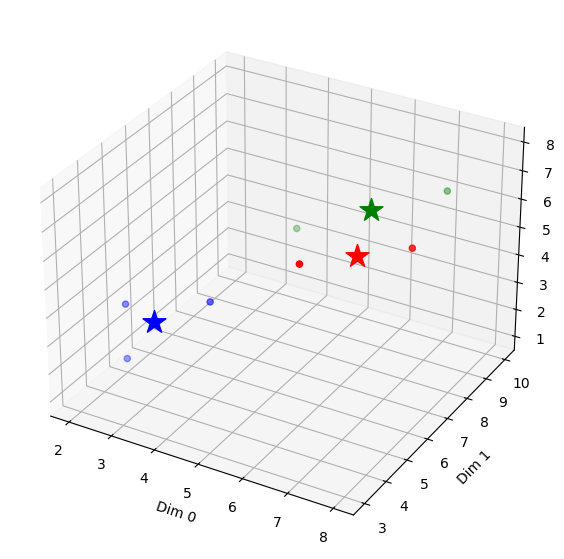

In [13]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
coordinates_to_plot = [0,1,2]
color_array = np.array(['red', 'blue', 'green'])
ax.scatter3D(
            X[coordinates_to_plot[0],:], # x
            X[coordinates_to_plot[1],:], # y
            X[coordinates_to_plot[2],:], # y
            color=color_array[C_3] # color depends on cluster idx
            )
for i in range(3):
    ax.scatter3D(
            centroids_3[coordinates_to_plot[0],i], # x
            centroids_3[coordinates_to_plot[1],i], # y
            centroids_3[coordinates_to_plot[2],i], # y
            marker='*', # star instead of circle
            s=300, # size
            color=color_array[i] # color 
            )

ax.set_xlabel('Dim %d'%coordinates_to_plot[0])
ax.set_ylabel('Dim %d'%coordinates_to_plot[1])
ax.set_zlabel('Dim %d'%coordinates_to_plot[2])


#### 1 e) SVD can be also used to find $\boldsymbol{T}$ and $\boldsymbol{W}$ such that $\boldsymbol{X} \approx \boldsymbol{T} \boldsymbol{W}$.   Assume that you are given the SVD of $\boldsymbol{X}$, i.e., $\boldsymbol{X} = \boldsymbol{U}\boldsymbol{S}\boldsymbol{V}^T$.   Find SVD-based $\boldsymbol{T}$ and $\boldsymbol{W}$ as a function of  $\boldsymbol{U}, \boldsymbol{S}, \boldsymbol{V}$ (In an equation form, not numbers.)  Recall that $\boldsymbol{T}$ is a 5-by-$r$ matrix with orthonormal columns.

Your answer goes here: T(5xr)=U(S_matrix) and W=V^T

#### 1 f) Find $\boldsymbol{T}, \boldsymbol{W}$ and the rank-$r$ approximation to $\boldsymbol{X}$ for $r=2$.  What aspects of the ratings does the first taste vector capture?  What about the second taste vector?

In [21]:
U, s, VT = np.linalg.svd(X, full_matrices=True) #s is row of singular values
S_matrix = np.zeros_like(X) #now diagonal
np.fill_diagonal(S_matrix, s)

## Fill in the blank using U, S_matrix, and VT
T = U@S_matrix
W = VT

for r in range(0,2):
    T_r = T[:,0:r+1] ## Choose the first r columns of T
    W_r = W[0:r+1,:] ## Choose the first r rows of W
    print(T_r)
    print(W_r)
    
#taste WHATTTTTTTTTT, 

[[13.79]
 [16.66]
 [13.25]
 [15.36]
 [14.37]]
[[0.42 0.38 0.25 0.46 0.54 0.30 0.18]]
[[13.79 3.24]
 [16.66 -4.77]
 [13.25 3.78]
 [15.36 -5.61]
 [14.37 4.93]]
[[0.42 0.38 0.25 0.46 0.54 0.30 0.18]
 [-0.44 0.69 -0.29 0.34 -0.18 -0.04 -0.30]]


#### 1 g) The following code visualizes the rank-$r$ approximation for an increasing value of $r$.  When does the approximation become exact?  Why?

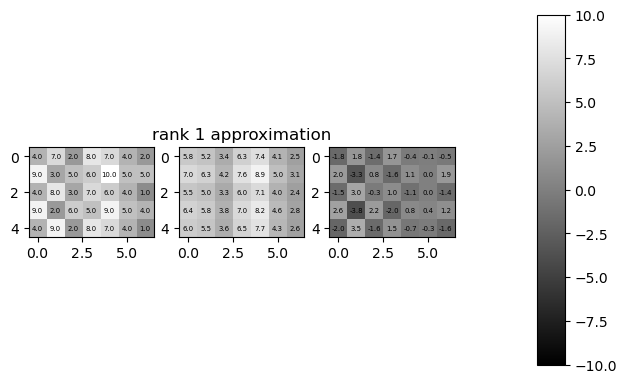

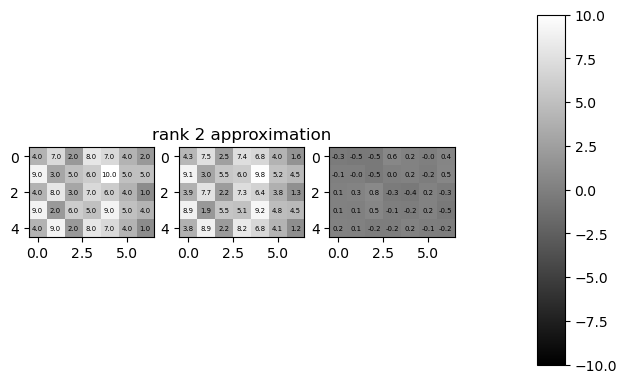

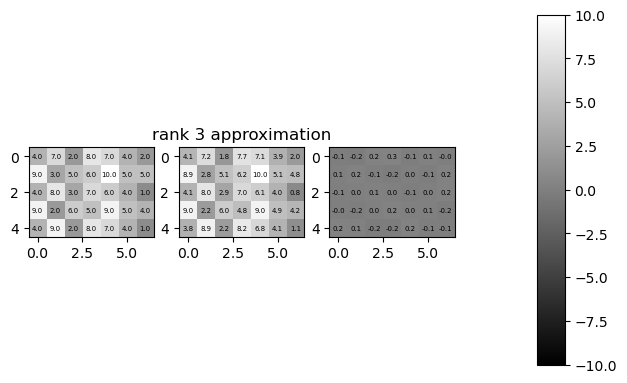

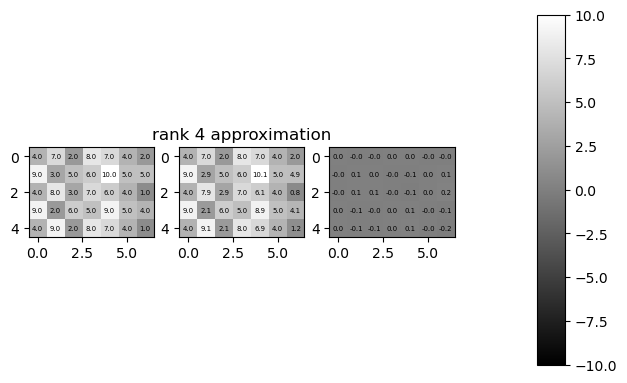

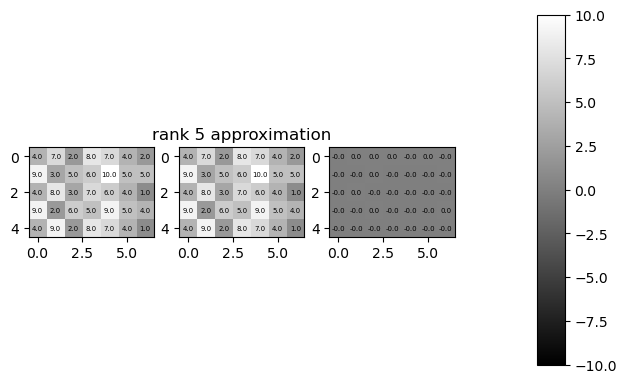

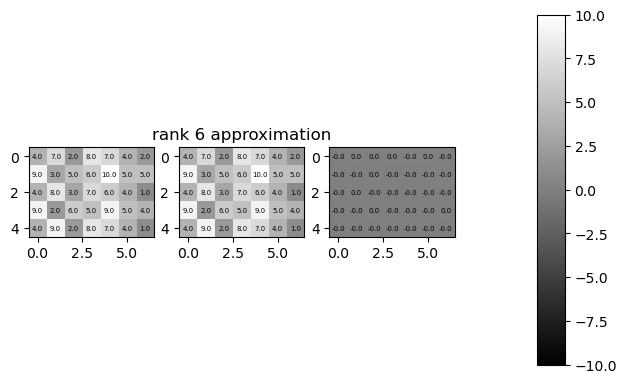

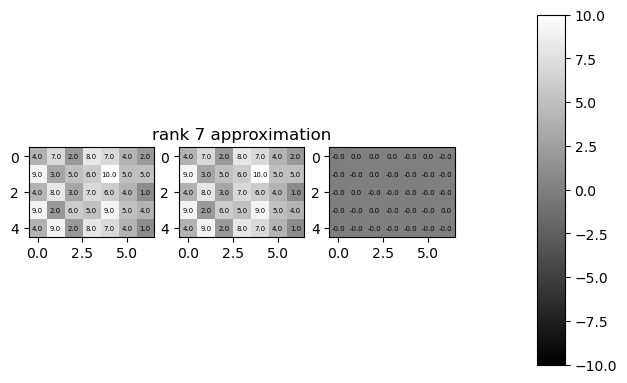

In [22]:
for r in range(0,7):
    T_r = T[:,0:r+1] ## Choose the first r columns of T
    W_r = W[0:r+1,:] ## Choose the first r rows of W
    X_rank_r_approx = T_r@W_r
    fig, ax = plt.subplots(1,3,figsize=(5.5, 5))
    for (j,i),label in np.ndenumerate(X):
        ax[0].text(i,j,np.round(label,1),ha='center',va='center', size=5)
    im = ax[0].imshow(X, vmin=-10, vmax=10, interpolation='none', cmap='gray')
    for (j,i),label in np.ndenumerate(X_rank_r_approx):
        ax[1].text(i,j,np.round(label,1),ha='center',va='center', size=5)
    im = ax[1].imshow(X_rank_r_approx, vmin=-10, vmax=10, interpolation='none', cmap='gray')
    for (j,i),label in np.ndenumerate(X-X_rank_r_approx):
        ax[2].text(i,j,np.round(label,1),ha='center',va='center', size=5)
    im = ax[2].imshow(X-X_rank_r_approx, vmin=-10, vmax=10, interpolation='none', cmap='gray')

    cbar_ax = fig.add_axes([1.05, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    ax[1].set_title("rank %d approximation" % (r+1))
    
#it becomes exact at rank5, X is rank5

#### 1 g) Your friend Jon rates Star Trek 6 and Pride and Prejudice 4.  Assume a two-column taste matrix $\boldsymbol{T}$.  Formulate a system of equations that can find Jon's weight vector.  Write down the least square solution.

Your answer goes here: x_til=X(first 2 rows), y= (6, 4)

w= (x_til^T x_til)^-1 x_til^T y

#### 1 h) Using this weight vector, how can we predict Jon's ratings for all five movies, including the remaining three movies?

Your answer goes here: y= X(full)w

#### 1 i) Predict Jon's ratings for all the five movies with different choices of the taste matrix.
- Choice 1: $T$ is the two centroids of the $K$-means result with $K=2$
- Choice 2: $T$ is the first two centroids of the $K$-means result with $K=3$
- Choice 3: $T$ is the first two SVD-based taste vectors

In [24]:
y = np.array([[6],[4]])

## Choice 1: K-means (K=2) based taste matrix T
T = centroids_2[:,0:2] # fill in the blank
T_12 = T[0:2,:]
print(T@np.linalg.inv(T_12.T@T_12)@T_12.T@y)

## Choice 2: K-means (K=3) based taste matrix T
T = centroids_3[:,0:2] # fill in the blank
T_12 = T[0:2,:]
print(T@np.linalg.inv(T_12.T@T_12)@T_12.T@y)

## Choice 3: SVD based taste matrix T
T = U@S_matrix[:,0:2] # fill in the blank
T_12 = T[0:2,:]
print(T@np.linalg.inv(T_12.T@T_12)@T_12.T@y)

[[6.00]
 [4.00]
 [5.65]
 [2.95]
 [7.08]]
[[6.00]
 [4.00]
 [6.00]
 [3.24]
 [6.72]]
[[6.00]
 [4.00]
 [6.01]
 [3.23]
 [6.83]]
